In [1]:
# Vorstellung: MNIST-Daten!
# http://yann.lecun.com/exdb/mnist/
# FashionMNIST: https://github.com/zalandoresearch/fashion-mnist

import gzip
import numpy as np
from keras.utils import to_categorical

def open_images(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=16)\
            .reshape(-1, 28, 28)\
            .astype(np.float32)


def open_labels(filename):
    with gzip.open(filename, "rb") as file:
        data = file.read()
        return np.frombuffer(data, dtype=np.uint8, offset=8)
    
X_train = open_images("../data/fashion/train-images-idx3-ubyte.gz")
y_train = open_labels("../data/fashion/train-labels-idx1-ubyte.gz")

X_test = open_images("../data/fashion/t10k-images-idx3-ubyte.gz")
y_test = open_labels("../data/fashion/t10k-labels-idx1-ubyte.gz")

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [2]:
from keras.models import Sequential
from keras.layers import Dense

In [3]:
model = Sequential()

model.add(Dense(100, activation="sigmoid", input_shape=(784,)))
model.add(Dense(10, activation="sigmoid"))

model.compile(optimizer="sgd", loss="categorical_crossentropy", metrics=["accuracy"])

In [4]:
X_train.reshape(60000, 784)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [13]:
model.fit(
    X_train.reshape(60000, 784),
    y_train,
    epochs=100,
    batch_size=1000)

Epoch 1/100
60/60 [==============================] - 0s 3ms/step - loss: 0.7993 - accuracy: 0.7782
Epoch 2/100
60/60 [==============================] - 0s 3ms/step - loss: 0.7692 - accuracy: 0.7842
Epoch 3/100
60/60 [==============================] - 0s 3ms/step - loss: 0.7430 - accuracy: 0.7890
Epoch 4/100
60/60 [==============================] - 0s 3ms/step - loss: 0.7203 - accuracy: 0.7938
Epoch 5/100
60/60 [==============================] - 0s 3ms/step - loss: 0.6996 - accuracy: 0.7981
Epoch 6/100
60/60 [==============================] - 0s 3ms/step - loss: 0.6815 - accuracy: 0.8018
Epoch 7/100
60/60 [==============================] - 0s 3ms/step - loss: 0.6653 - accuracy: 0.8052
Epoch 8/100
60/60 [==============================] - 0s 3ms/step - loss: 0.6506 - accuracy: 0.8081
Epoch 9/100
60/60 [==============================] - 0s 3ms/step - loss: 0.6370 - accuracy: 0.8103
Epoch 10/100
60/60 [==============================] - 0s 3ms/step - loss: 0.6252 - accuracy: 0.8124
Epoch 11/

60/60 [==============================] - 0s 3ms/step - loss: 0.3923 - accuracy: 0.8687
Epoch 84/100
60/60 [==============================] - 0s 3ms/step - loss: 0.3920 - accuracy: 0.8689
Epoch 85/100
60/60 [==============================] - 0s 3ms/step - loss: 0.3923 - accuracy: 0.8678
Epoch 86/100
60/60 [==============================] - 0s 3ms/step - loss: 0.3904 - accuracy: 0.8686
Epoch 87/100
60/60 [==============================] - 0s 3ms/step - loss: 0.3872 - accuracy: 0.8700
Epoch 88/100
60/60 [==============================] - 0s 3ms/step - loss: 0.3910 - accuracy: 0.8676
Epoch 89/100
60/60 [==============================] - 0s 3ms/step - loss: 0.3896 - accuracy: 0.8683
Epoch 90/100
60/60 [==============================] - 0s 3ms/step - loss: 0.3863 - accuracy: 0.8690
Epoch 91/100
60/60 [==============================] - 0s 3ms/step - loss: 0.3855 - accuracy: 0.8702
Epoch 92/100
60/60 [==============================] - 0s 3ms/step - loss: 0.3853 - accuracy: 0.8702
Epoch 93/100


In [14]:
model.evaluate(X_test.reshape(-1, 784), y_test)

313/313 [==============================] - 0s 553us/step - loss: 0.4545 - accuracy: 0.8414


[0.4545433223247528, 0.8414000272750854]

In [15]:
model.predict(X_test.reshape(-1, 784))

array([[2.1910667e-04, 1.4793873e-04, 1.4129281e-04, ..., 4.8643947e-03,
        6.6852570e-04, 9.8323196e-02],
       [6.0531497e-04, 1.1075927e-04, 2.6070160e-01, ..., 6.9157737e-05,
        2.6491284e-04, 5.5506403e-05],
       [1.2179017e-03, 3.2371408e-01, 5.4475665e-04, ..., 2.6962161e-04,
        1.4403462e-04, 1.2922287e-04],
       ...,
       [2.6087165e-03, 4.5746143e-05, 1.6096234e-04, ..., 1.7464161e-04,
        7.2245181e-02, 1.7866492e-04],
       [2.1132827e-04, 2.4043721e-01, 2.4840236e-04, ..., 1.4606416e-03,
        2.0414591e-04, 4.8521161e-04],
       [9.0252470e-05, 8.1872691e-05, 1.6027689e-04, ..., 5.0885379e-03,
        5.1015615e-04, 6.4530969e-04]], dtype=float32)

[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


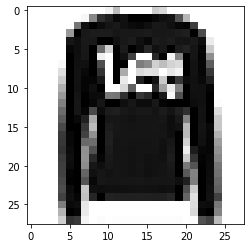

In [16]:
%matplotlib inline

import matplotlib.pyplot as plt

print(y_test[1])

plt.imshow(X_test[1], cmap="gray_r")
plt.show()

In [17]:
pred = model.predict(X_test.reshape(-1, 784))

In [18]:
import numpy as np

np.argmax(pred[1])

2

In [19]:
np.argmax(pred, axis=1)

array([9, 2, 1, ..., 8, 1, 5])

In [20]:
import pandas as pd

ytrue = pd.Series(np.argmax(y_test, axis = 1), name = 'actual')
ypred = pd.Series(np.argmax(pred, axis = 1), name = 'pred')

pd.crosstab(ytrue, ypred)

pred,0,1,2,3,4,5,6,7,8,9
actual,,,,,,,,,,
0,835,3,12,38,4,3,88,2,15,0
1,4,952,8,26,2,0,6,0,2,0
2,18,1,747,12,115,1,94,0,12,0
3,37,15,15,854,34,1,38,0,6,0
4,1,1,110,36,736,0,110,0,6,0
5,1,0,0,1,0,904,0,44,5,45
6,172,4,105,34,79,1,579,0,26,0
7,0,0,0,0,0,36,0,917,0,47
8,1,1,13,7,3,4,17,5,948,1
